In [1]:
se_f =  "/data2/mito_lineage/output/annotation/data/v01_oct012021/cd34norm/MTblacklist/mergedSamples/allSamples.integrated.rds"
cells_meta_f = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv"
#"/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/clones.txt"
outdir = "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist"
ids.reversed = TRUE
#enrichment_f

In [2]:
cells_meta <- as.data.frame(readr::read_tsv(cells_meta_f)) # %>% tidyr::unite(barcode)
rownames(cells_meta) = cells_meta$ID



Rows: 14882 Columns: 4

── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ID, condition
dbl (2): lineage, donor


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
if (ids.reversed){
    split.names <- stringr::str_split(rownames(cells_meta), "_")
    rownames(cells_meta) = lapply(split.names, function(x){paste0(x[2], "_", x[1])})
}
head(cells_meta)

,ID,lineage,donor,condition
,<chr>,<dbl>,<dbl>,<chr>
Flt3l_AAACGAATCAAGTTGC-1,AAACGAATCAAGTTGC-1_Flt3l,0,0,Flt3l
Control_AAACTCGCAAGACTTC-1,AAACTCGCAAGACTTC-1_Control,0,0,Control
Flt3l_AAACTGCCAAGGGTAC-1,AAACTGCCAAGGGTAC-1_Flt3l,0,0,Flt3l
Flt3l_AAAGGATGTGGTTCTA-1,AAAGGATGTGGTTCTA-1_Flt3l,0,0,Flt3l
Control_AAAGGGCCATAGGCGA-1,AAAGGGCCATAGGCGA-1_Control,0,0,Control
Flt3l_AAAGGGCGTTCTGAGT-1,AAAGGGCGTTCTGAGT-1_Flt3l,0,0,Flt3l


In [4]:
se <- readRDS(se_f)
se[[]]

Loading required package: SeuratObject



,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,proj,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<int>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,0,740,0,1330,2434,Control,5,5,1673,1406
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,0,1611,0,3462,6167,Control,0,0,4315,3063
Control_AAACGAAAGTCGTGAG-1,Control,994,994,10177,2450,48,60,657,2135,4827,⋯,0,775,0,966,1768,Control,5,5,1731,1414
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,0,1239,0,2701,4951,Control,0,0,3113,2340
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,0,621,0,1138,2019,Control,5,5,1559,1394
Control_AAACGAACACTGATAC-1,Control,954,954,9449,1971,59,21,489,3785,3124,⋯,0,517,0,878,1595,Control,2,2,1370,1207
Control_AAACGAACAGTAACCT-1,Control,693,693,6196,1097,19,17,288,2635,2140,⋯,0,397,0,651,1170,Control,8,8,1018,939
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,0,3467,0,7263,13261,Control,12,12,8645,5001
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,0,451,0,1042,1920,Control,7,7,1005,905


In [5]:
# se_meta = se[[]]
# rownames(se_meta) <- apply(stringr::str_split((rownames(se_meta)), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[1],  "_", x[2])})

In [6]:
apply(stringr::str_split((rownames(se[[]])), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[[1]],  "_", x[[2]])})

[1] "Control_AAACGAAAGAGGTCCA-1" "Control_AAACGAAAGCGATACG-1"
    [3] "Control_AAACGAAAGTCGTGAG-1" "Control_AAACGAACAATAGTGA-1"
    [5] "Control_AAACGAACACAATAAG-1" "Control_AAACGAACACTGATAC-1"
    [7] "Control_AAACGAACAGTAACCT-1" "Control_AAACGAACATCGTGAT-1"
    [9] "Control_AAACGAAGTAACGGTG-1" "Control_AAACGAAGTAAGTCTC-1"
   [11] "Control_AAACGAAGTACCAAGG-1" "Control_AAACGAAGTCCCGTGA-1"
   [13] "Control_AAACGAAGTGGATTCT-1" "Control_AAACGAATCGAGCGCT-1"
   [15] "Control_AAACGAATCGCAACTA-1" "Control_AAACGAATCGCGCTGA-1"
   [17] "Control_AAACTCGAGATTACGA-1" "Control_AAACTCGCAAGACTTC-1"
   [19] "Control_AAACTCGCACAAGGGT-1" "Control_AAACTCGCACCTCGTT-1"
   [21] "Control_AAACTCGCACTTGCGG-1" "Control_AAACTCGCATCGCCTT-1"
   [23] "Control_AAACTCGCATGTGGGA-1" "Control_AAACTCGGTATCCTTT-1"
   [25] "Control_AAACTCGGTGCCCTAG-1" "Control_AAACTCGGTGTAGGAC-1"
   [27] "Control_AAACTCGTCACTAGCA-1" "Control_AAACTCGTCGAGTGTT-1"
   [29] "Control_AAACTCGTCTATCCTA-1" "Control_AAACTGCAGCATGTGG-1"
   [31] "Control_AAACTGCAGGGACGTT-1" "Control_AAACTGCAGGTTTCTG-1"
   [33] "Control_AAACTGCAGTATAGTG-1" "Control_AAACTGCAGTCCCGCA-1"
   [35] "Control_AAACTGCCAAGTCTCA-1" "Control_AAACTGCCACCGATCG-1"
   [37] "Control_AAACTGCCAGCAACAG-1" "Control_AAACTGCTCAAGGCCC-1"
   [39] "Control_AAACTGCTCCCAGCAG-1" "Control_AAACTGCTCGAGGCTC-1"
   [41] "Control_AAACTGCTCTCCTTGG-1" "Control_AAAGATGAGAAGCCTG-1"
   [43] "Control_AAAGATGAGAGTGGTC-1" "Control_AAAGATGAGGAAGAAC-1"
   [45] "Control_AAAGATGAGTTCGACT-1" "Control_AAAGATGCAAAGGAAG-1"
   [47] "Control_AAAGATGCAACTACTG-1" "Control_AAAGATGCAATAGTGA-1"
   [49] "Control_AAAGATGCACTCAGCG-1" "Control_AAAGATGCAGTAACCT-1"
   [51] "Control_AAAGATGGTAAACGTA-1" "Control_AAAGATGGTAAGTCTC-1"
   [53] "Control_AAAGATGGTCGAGGTA-1" "Control_AAAGATGGTGCATTGT-1"
   [55] "Control_AAAGATGGTGCGCTCA-1" "Control_AAAGATGGTTAAGGGC-1"
   [57] "Control_AAAGATGTCACTCGGG-1" "Control_AAAGATGTCAGAGTGG-1"
   [59] "Control_AAAGATGTCCATAGGT-1" "Control_AAAGATGTCCTTTGCG-1"
   [61] "Control_AAAGGATAGACGCCCT-1" "Control_AAAGGATAGGGATCCA-1"
   [63] "Control_AAAGGATCAAGGTTCT-1" "Control_AAAGGATCAATGAAAC-1"
   [65] "Control_AAAGGATCACAGTTAC-1" "Control_AAAGGATCATCCATAG-1"
   [67] "Control_AAAGGATGTAACTGAA-1" "Control_AAAGGATGTAGGTAAT-1"
   [69] "Control_AAAGGATGTAGTAACA-1" "Control_AAAGGATGTAGTCCAT-1"
   [71] "Control_AAAGGATGTGCAAGCA-1" "Control_AAAGGATGTGCTGGCT-1"
   [73] "Control_AAAGGATGTTGGGAAC-1" "Control_AAAGGATTCACAAGCT-1"
   [75] "Control_AAAGGATTCAGGATCT-1" "Control_AAAGGATTCCATACCC-1"
   [77] "Control_AAAGGATTCCTCATTA-1" "Control_AAAGGGCAGATGGGAA-1"
   [79] "Control_AAAGGGCAGTGATTAG-1" "Control_AAAGGGCAGTGTGTAA-1"
   [81] "Control_AAAGGGCCATAGGCGA-1" "Control_AAAGGGCGTCAACTAC-1"
   [83] "Control_AAAGGGCGTGCAGACA-1" "Control_AAAGGGCGTGCGCTCA-1"
   [85] "Control_AAAGGGCTCGCACCTT-1" "Control_AAAGGGCTCGTGATAC-1"
   [87] "Control_AAAGGGCTCTACTTTG-1" "Control_AAATGAGAGACTTCCA-1"
   [89] "Control_AAATGAGAGCCATGGA-1" "Control_AAATGAGAGGCACTAG-1"
   [91] "Control_AAATGAGAGGTCTTGT-1" "Control_AAATGAGAGTAACACA-1"
   [93] "Control_AAATGAGAGTGATATG-1" "Control_AAATGAGAGTTGGAAT-1"
   [95] "Control_AAATGAGCACAGCTTA-1" "Control_AAATGAGCACCATTCC-1"
   [97] "Control_AAATGAGCACCTGTGG-1" "Control_AAATGAGGTAATGTGA-1"
   [99] "Control_AAATGAGGTAGGGTCA-1" "Control_AAATGAGGTGGTGGTA-1"
  [101] "Control_AAATGAGGTTAACTCG-1" "Control_AAATGAGGTTTGCATG-1"
  [103] "Control_AAATGAGTCTCTGTTA-1" "Control_AAATGAGTCTGCGTCT-1"
  [105] "Control_AAATGAGTCTGGCGCA-1" "Control_AAATGCCAGCAGAAAG-1"
  [107] "Control_AAATGCCAGCAGTAGC-1" "Control_AAATGCCAGCGTATCT-1"
  [109] "Control_AAATGCCAGGTAGGAA-1" "Control_AAATGCCAGTGCCCTG-1"
  [111] "Control_AAATGCCAGTGGTGTG-1" "Control_AAATGCCAGTGTTCCA-1"
  [113] "Control_AAATGCCCAAGCGTCC-1" "Control_AAATGCCCACACACAT-1"
  [115] "Control_AAATGCCCACTCAAGT-1" "Control_AAATGCCCAGATACAA-1"
  [117] "Control_AAATGCCCATGTCCCT-1" "Control_AAATGCCTCCCTACCA-1"
  [119] "Control_AAATGCCTCGATCTTT-1" "Control_AAATGCCTCTTCATAC-1"
  [121] "Control_AACAAAGAGACTAGCG-1" "Contro

In [7]:
se$ID <- apply(stringr::str_split((rownames(se[[]])), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[[1]],  "_", x[[2]])})

Loading required package: Signac

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 



In [8]:
se <- RenameCells(se, new.names=se$ID)

In [9]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,proj,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<int>,<chr>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,740,0,1330,2434,Control,5,5,1673,1406,Control_AAACGAAAGAGGTCCA-1
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,1611,0,3462,6167,Control,0,0,4315,3063,Control_AAACGAAAGCGATACG-1
Control_AAACGAAAGTCGTGAG-1,Control,994,994,10177,2450,48,60,657,2135,4827,⋯,775,0,966,1768,Control,5,5,1731,1414,Control_AAACGAAAGTCGTGAG-1
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,1239,0,2701,4951,Control,0,0,3113,2340,Control_AAACGAACAATAGTGA-1
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,621,0,1138,2019,Control,5,5,1559,1394,Control_AAACGAACACAATAAG-1
Control_AAACGAACACTGATAC-1,Control,954,954,9449,1971,59,21,489,3785,3124,⋯,517,0,878,1595,Control,2,2,1370,1207,Control_AAACGAACACTGATAC-1
Control_AAACGAACAGTAACCT-1,Control,693,693,6196,1097,19,17,288,2635,2140,⋯,397,0,651,1170,Control,8,8,1018,939,Control_AAACGAACAGTAACCT-1
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,3467,0,7263,13261,Control,12,12,8645,5001,Control_AAACGAACATCGTGAT-1
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,451,0,1042,1920,Control,7,7,1005,905,Control_AAACGAAGTAACGGTG-1


In [10]:
new_cells_meta = merge(cells_meta, se[[]], by=0, all=TRUE)
head(new_cells_meta)

,Row.names,ID.x,lineage,donor,condition,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,⋯,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,proj,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID.y
,<I<chr>>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<int>,<chr>
1,Control_AAACGAAAGAGGTCCA-1,AAACGAAAGAGGTCCA-1_Control,9,3,Control,Control,1357,1357,16929,2587,⋯,740,0,1330,2434,Control,5,5,1673,1406,Control_AAACGAAAGAGGTCCA-1
2,Control_AAACGAAAGCGATACG-1,AAACGAAAGCGATACG-1_Control,0,1,Control,Control,3505,3505,45359,10546,⋯,1611,0,3462,6167,Control,0,0,4315,3063,Control_AAACGAAAGCGATACG-1
3,Control_AAACGAAAGTCGTGAG-1,AAACGAAAGTCGTGAG-1_Control,8,0,Control,Control,994,994,10177,2450,⋯,775,0,966,1768,Control,5,5,1731,1414,Control_AAACGAAAGTCGTGAG-1
4,Control_AAACGAACAATAGTGA-1,AAACGAACAATAGTGA-1_Control,11,3,Control,Control,2687,2687,22452,4364,⋯,1239,0,2701,4951,Control,0,0,3113,2340,Control_AAACGAACAATAGTGA-1
5,Control_AAACGAACACAATAAG-1,AAACGAACACAATAAG-1_Control,22,0,Control,Control,1184,1184,11763,2003,⋯,621,0,1138,2019,Control,5,5,1559,1394,Control_AAACGAACACAATAAG-1
6,Control_AAACGAACACTGATAC-1,AAACGAACACTGATAC-1_Control,11,2,Control,Control,954,954,9449,1971,⋯,517,0,878,1595,Control,2,2,1370,1207,Control_AAACGAACACTGATAC-1


In [11]:
rownames(new_cells_meta) <- new_cells_meta$Row.names

In [12]:
donor_levels <- levels(factor(new_cells_meta$donor))
donor_levels[length(donor_levels) + 1] <- "None"

condition_levels <- levels(factor(new_cells_meta$condition))
condition_levels[length(condition_levels) + 1] <- "None"

lineage_levels <- levels(factor(new_cells_meta$lineage))
lineage_levels[length(lineage_levels) + 1] <- "None"

new_cells_meta$donor <- factor(new_cells_meta$donor, levels=donor_levels)
new_cells_meta$condition <- factor(new_cells_meta$condition, levels=condition_levels)
new_cells_meta$lineage <- factor(new_cells_meta$lineage, levels=lineage_levels)

new_cells_meta$donor[is.na(new_cells_meta$donor)] <- "None"
new_cells_meta$condition[is.na(new_cells_meta$condition)] <- "None"
new_cells_meta$lineage[is.na(new_cells_meta$lineage)] <- "None"

In [13]:
new_cells_meta

,Row.names,ID.x,lineage,donor,condition,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,⋯,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,proj,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID.y
,<I<chr>>,<chr>,<fct>,<fct>,<fct>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<int>,<chr>
Control_AAACGAAAGAGGTCCA-1,Control_AAACGAAAGAGGTCCA-1,AAACGAAAGAGGTCCA-1_Control,9,3,Control,Control,1357,1357,16929,2587,⋯,740,0,1330,2434,Control,5,5,1673,1406,Control_AAACGAAAGAGGTCCA-1
Control_AAACGAAAGCGATACG-1,Control_AAACGAAAGCGATACG-1,AAACGAAAGCGATACG-1_Control,0,1,Control,Control,3505,3505,45359,10546,⋯,1611,0,3462,6167,Control,0,0,4315,3063,Control_AAACGAAAGCGATACG-1
Control_AAACGAAAGTCGTGAG-1,Control_AAACGAAAGTCGTGAG-1,AAACGAAAGTCGTGAG-1_Control,8,0,Control,Control,994,994,10177,2450,⋯,775,0,966,1768,Control,5,5,1731,1414,Control_AAACGAAAGTCGTGAG-1
Control_AAACGAACAATAGTGA-1,Control_AAACGAACAATAGTGA-1,AAACGAACAATAGTGA-1_Control,11,3,Control,Control,2687,2687,22452,4364,⋯,1239,0,2701,4951,Control,0,0,3113,2340,Control_AAACGAACAATAGTGA-1
Control_AAACGAACACAATAAG-1,Control_AAACGAACACAATAAG-1,AAACGAACACAATAAG-1_Control,22,0,Control,Control,1184,1184,11763,2003,⋯,621,0,1138,2019,Control,5,5,1559,1394,Control_AAACGAACACAATAAG-1
Control_AAACGAACACTGATAC-1,Control_AAACGAACACTGATAC-1,AAACGAACACTGATAC-1_Control,11,2,Control,Control,954,954,9449,1971,⋯,517,0,878,1595,Control,2,2,1370,1207,Control_AAACGAACACTGATAC-1
Control_AAACGAACAGTAACCT-1,Control_AAACGAACAGTAACCT-1,AAACGAACAGTAACCT-1_Control,34,2,Control,Control,693,693,6196,1097,⋯,397,0,651,1170,Control,8,8,1018,939,Control_AAACGAACAGTAACCT-1
Control_AAACGAACATCGTGAT-1,Control_AAACGAACATCGTGAT-1,AAACGAACATCGTGAT-1_Control,2,3,Control,Control,6800,6800,100024,36721,⋯,3467,0,7263,13261,Control,12,12,8645,5001,Control_AAACGAACATCGTGAT-1
Control_AAACGAAGTAACGGTG-1,Control_AAACGAAGTAACGGTG-1,AAACGAAGTAACGGTG-1_Control,36,3,Control,Control,1074,1074,8454,1950,⋯,451,0,1042,1920,Control,7,7,1005,905,Control_AAACGAAGTAACGGTG-1


In [14]:
se <- AddMetaData(se, new_cells_meta)
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,ID.x,lineage,donor,condition,ID.y
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<int>,<chr>,<I<chr>>,<chr>,<fct>,<fct>,<fct>,<chr>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,5,1673,1406,Control_AAACGAAAGAGGTCCA-1,Control_AAACGAAAGAGGTCCA-1,AAACGAAAGAGGTCCA-1_Control,9,3,Control,Control_AAACGAAAGAGGTCCA-1
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,0,4315,3063,Control_AAACGAAAGCGATACG-1,Control_AAACGAAAGCGATACG-1,AAACGAAAGCGATACG-1_Control,0,1,Control,Control_AAACGAAAGCGATACG-1
Control_AAACGAAAGTCGTGAG-1,Control,994,994,10177,2450,48,60,657,2135,4827,⋯,5,1731,1414,Control_AAACGAAAGTCGTGAG-1,Control_AAACGAAAGTCGTGAG-1,AAACGAAAGTCGTGAG-1_Control,8,0,Control,Control_AAACGAAAGTCGTGAG-1
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,0,3113,2340,Control_AAACGAACAATAGTGA-1,Control_AAACGAACAATAGTGA-1,AAACGAACAATAGTGA-1_Control,11,3,Control,Control_AAACGAACAATAGTGA-1
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,5,1559,1394,Control_AAACGAACACAATAAG-1,Control_AAACGAACACAATAAG-1,AAACGAACACAATAAG-1_Control,22,0,Control,Control_AAACGAACACAATAAG-1
Control_AAACGAACACTGATAC-1,Control,954,954,9449,1971,59,21,489,3785,3124,⋯,2,1370,1207,Control_AAACGAACACTGATAC-1,Control_AAACGAACACTGATAC-1,AAACGAACACTGATAC-1_Control,11,2,Control,Control_AAACGAACACTGATAC-1
Control_AAACGAACAGTAACCT-1,Control,693,693,6196,1097,19,17,288,2635,2140,⋯,8,1018,939,Control_AAACGAACAGTAACCT-1,Control_AAACGAACAGTAACCT-1,AAACGAACAGTAACCT-1_Control,34,2,Control,Control_AAACGAACAGTAACCT-1
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,12,8645,5001,Control_AAACGAACATCGTGAT-1,Control_AAACGAACATCGTGAT-1,AAACGAACATCGTGAT-1_Control,2,3,Control,Control_AAACGAACATCGTGAT-1
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,7,1005,905,Control_AAACGAAGTAACGGTG-1,Control_AAACGAAGTAACGGTG-1,AAACGAAGTAACGGTG-1_Control,36,3,Control,Control_AAACGAAGTAACGGTG-1


## Plot by donor and condition

In [15]:
library("Seurat")
#library("Seurat")
library(magrittr)
library(cowplot)
library(ggplot2)

In [16]:
library(Seurat)
library(Signac)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




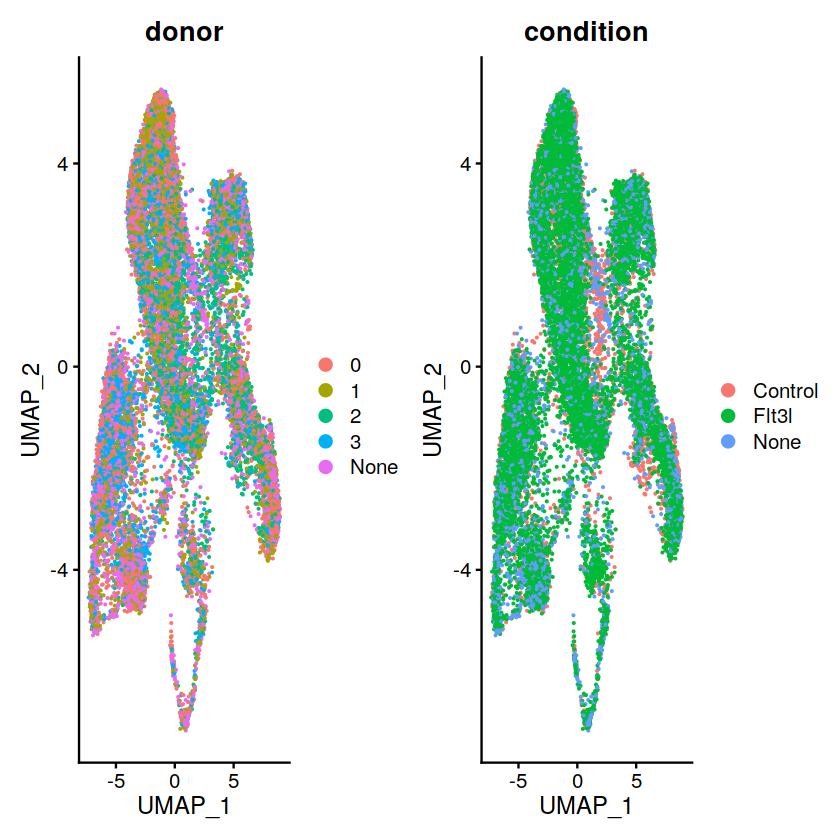

In [17]:
# Idents(t.cells) <- "orig.ident"
DimPlot(object = se, label = FALSE, group.by = c('donor', 'condition')) 

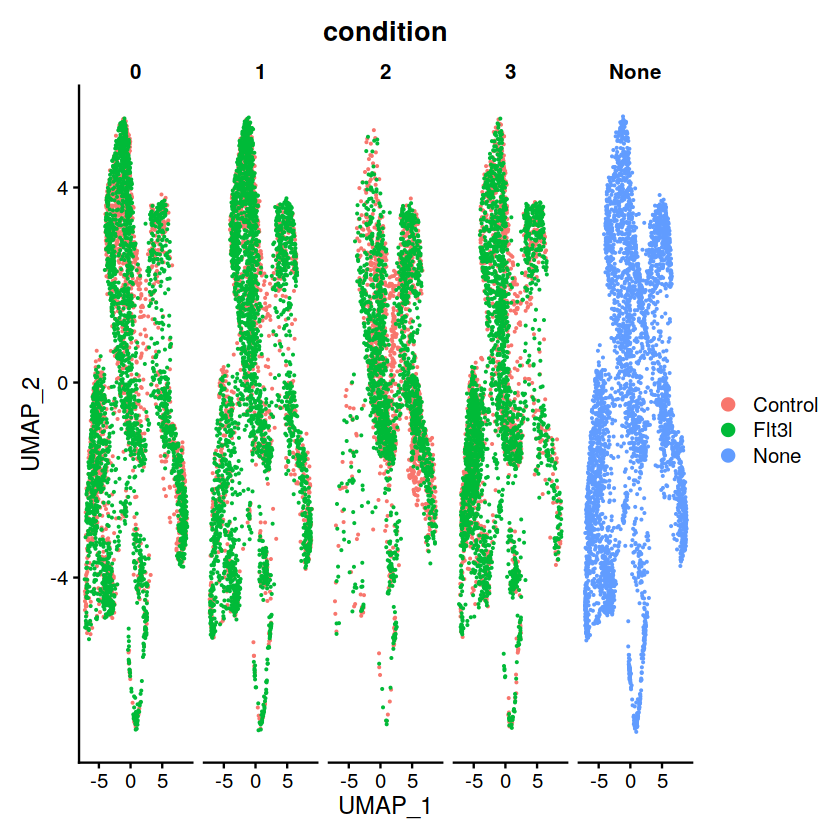

In [18]:
DimPlot(object = se, label = FALSE, split.by="donor", group.by = 'condition')

## Plot lineage

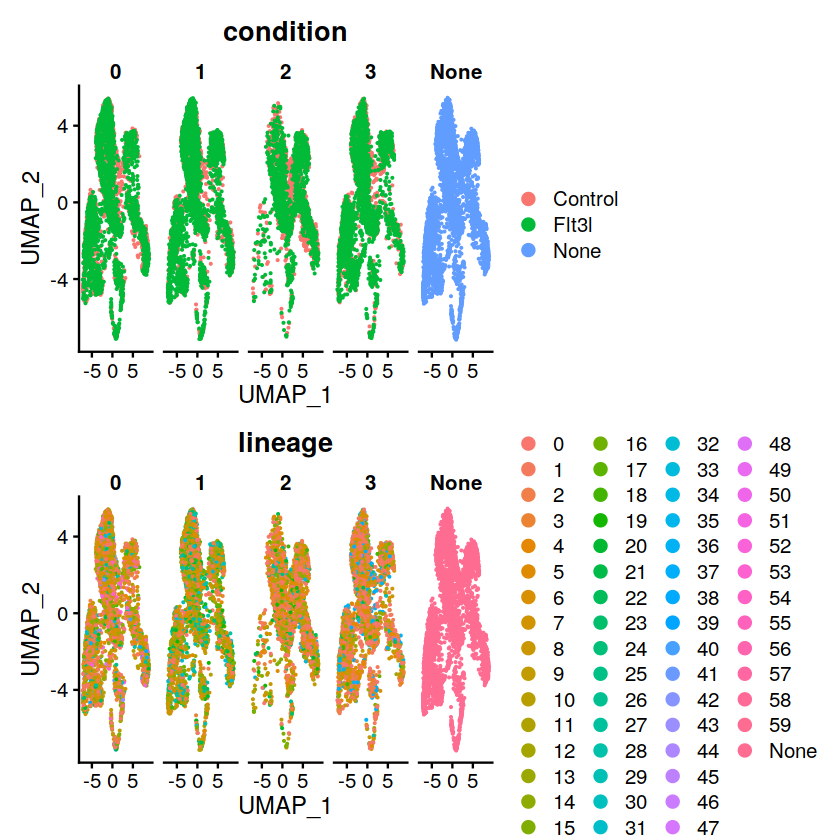

In [19]:
DimPlot(object = se, label = FALSE, split.by=c("donor"), group.by = c('condition', "lineage"))
#ggsave(file.path(outdir, "lineage.conditions.png"))

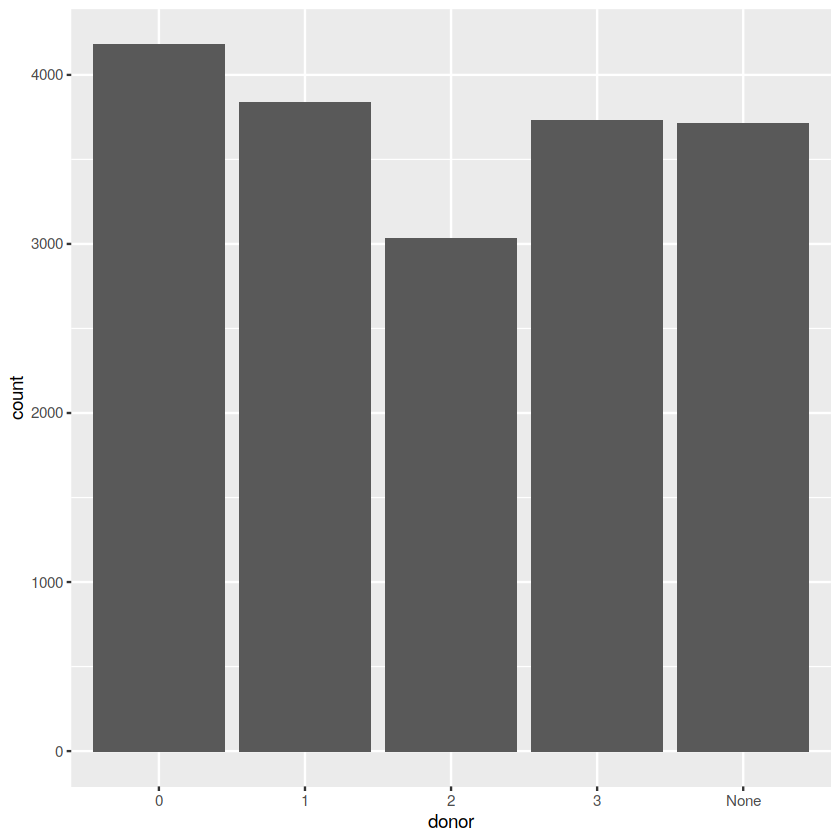

In [20]:
g <- ggplot(se[[]], aes(donor)) + 
            geom_bar()
g

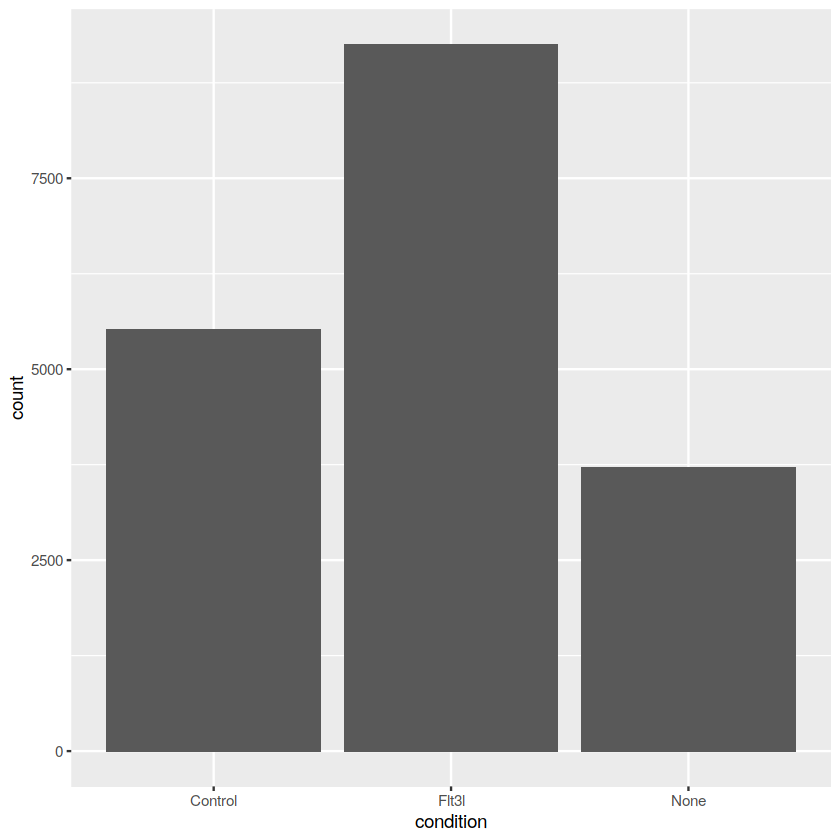

In [21]:
g <- ggplot(se[[]], aes(condition)) + 
            geom_bar()
g

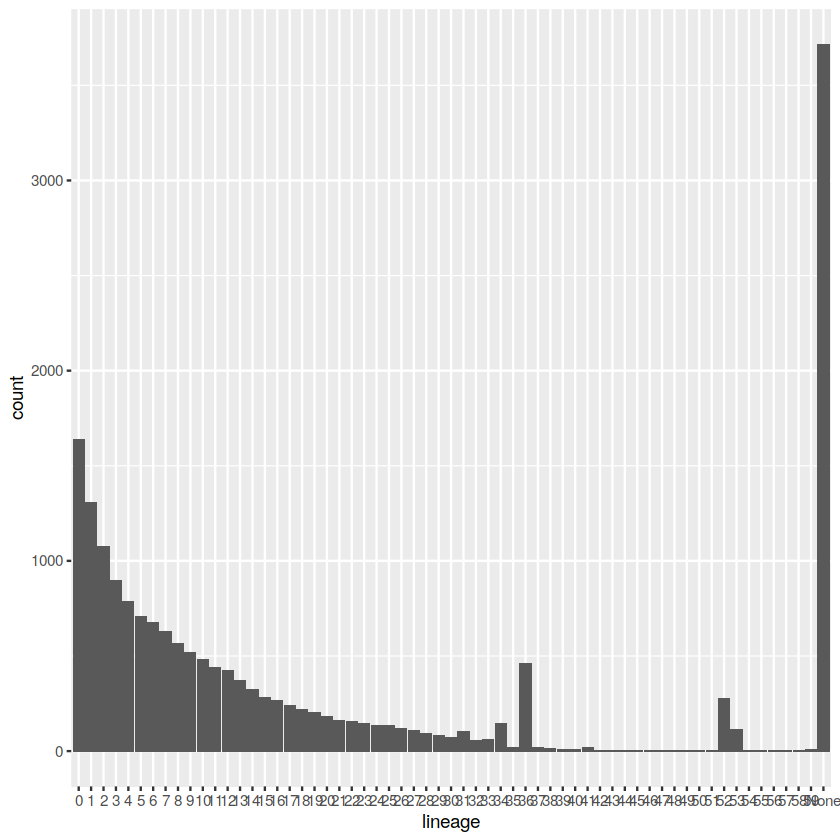

In [22]:
g <- ggplot(se[[]], aes(lineage)) + 
            geom_bar()
g

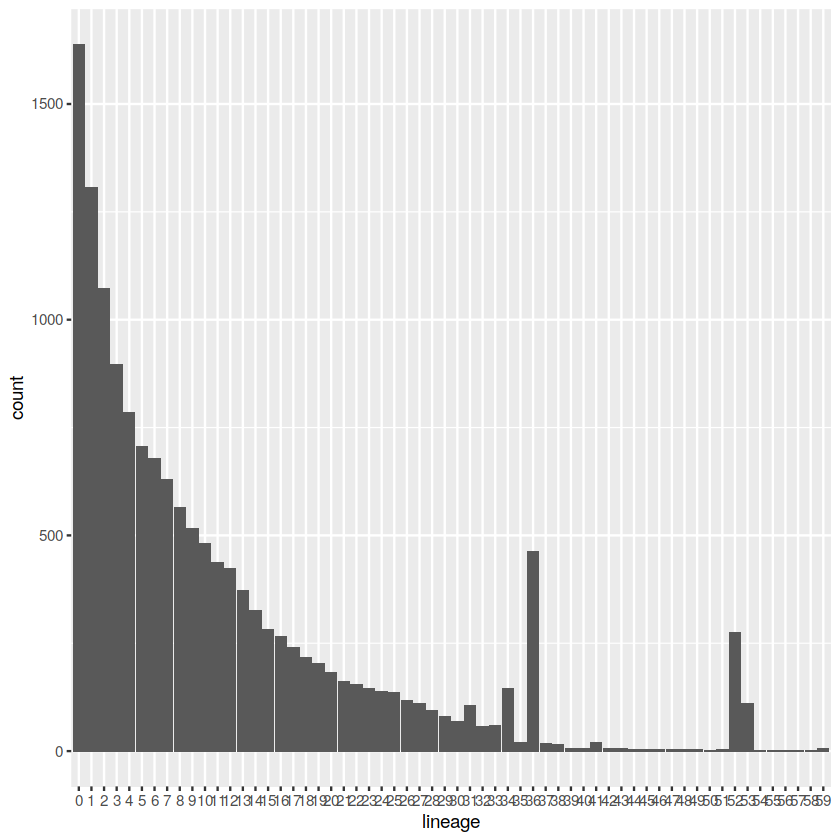

In [23]:
g <- ggplot(se[[]][!se[[]]$lineage == "None", ], aes(lineage)) + 
            geom_bar()
g

## Save

In [24]:
saveRDS(obj=se, file=file.path(outdir, "SE.rds"))

In [25]:
print

function (x, ...) 
UseMethod("print")
<bytecode: 0x55df0e666b58>
<environment: namespace:base>